In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [24.61, 27.58, 28.52, 25.94, 27.99, 27.82, 31.69, 16.43, 29.75, 28.89]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,24.61
1,London,51.5085,27.58
2,Oslo,59.9127,28.52
3,Beijing,39.9075,25.94
4,Mumbai,19.0144,27.99
5,Manila,14.6042,27.82
6,New York,40.7143,31.69
7,Seattle,47.6062,16.43
8,Dallas,32.7668,29.75
9,Taipei,25.0478,28.89


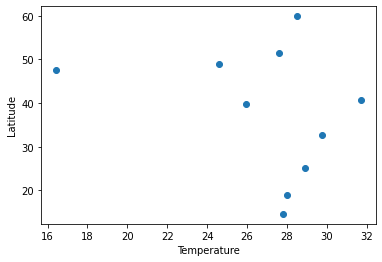

In [18]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(weather_data["lat"],weather_data["temp"])
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.show()

In [21]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"],weather_data["temp"])

# Get regression values
regress_values = weather_data["lat"]*slope + intercept

In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r2-value is -0.27


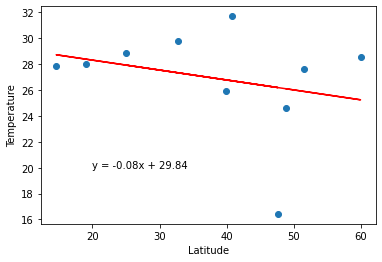

In [28]:
# Create Plot
plt.scatter(weather_data["lat"],weather_data["temp"])
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.plot(weather_data["lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,20))

# Print r square value
print("The r2-value is " + str(round(rvalue,2)))

# Show plot
plt.show()

In [30]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
predict_temp = 43.77 * slope + intercept
print(f"The predicted tempterature of Florence: {round(predict_temp,2)}")

The predicted tempterature of Florence: 26.48


In [31]:
# Use API to determine actual temperature
response = requests.get(query_url + "Florence").json()
print(f"The actual tempterature of Florence: {response['main']['temp']}")

The actual tempterature of Florence: 25.93
